Autores:

    - Pablo Simón Saiz
    - Alex Tomé Aguiar

# Flow Shop Permutacional

In [1]:
from utils import get_fichero, read_file, generar_permutador, funcion_f, tiempo_final_f
from searchs import local_search, rand_search, recocido_simulado
import pandas as pd
from genetico import genetic
import numpy as np

# Introducción de fichero
Aqui seleccionaremos el fichero que queramos leer, las opciones disponibles son las siguientes: (Dar valor de None para introducir por teclado).

    1. ejem_clase1
    2. ejem_clase2
    3. Doc1
    4. Doc2
    5. Doc3
    6. Doc4
    7. Doc5
    8. Doc6
    9. Doc7
    10. Doc8
    11. Doc9
    12. Doc10
    13. Doc11

In [2]:
NFILE = 5 # poner a None para pedir por teclado

file = get_fichero(NFILE)
print(file)

Data\Doc3.txt


# Lectura de fichero

In [3]:
d = read_file(file)
display(pd.DataFrame(d))

,0,1,2,3,4
0,456,537,123,214,234
1,789,854,225,528,123
2,876,632,588,896,456
3,543,145,669,325,789
4,210,785,966,147,876
5,123,214,332,856,543
6,456,752,144,321,210
7,789,143,755,427,123
8,876,698,322,546,456
9,543,532,100,321,789


# Generación del Permutador
Aqui se generará nuestro punto de partida.

In [4]:
v = generar_permutador(d)
print(v)

[3, 4, 0, 1, 10, 11, 6, 7, 8, 2, 9, 5]


# Funcion F

In [5]:
f = funcion_f(v, d)
display(pd.DataFrame(f))

,0,1,2,3,4
0,1209,2075,2627,2865,3761
1,1998,2929,3154,3682,3884
2,5329,5961,6549,7445,7901
3,543,688,1357,1682,2471
4,753,1538,2504,2651,3527
5,5995,6707,7039,8622,9233
6,2788,4073,4218,4618,5712
7,3577,4216,4973,5400,5835
8,4453,5151,5473,6019,6475
9,5872,6493,6649,7766,8690


# Busquedas
## Búsqueda Aleatoria
Este tipo de búsqueda depende totalmente de la suerte, por lo que no explota ningún tipo de camino encontrado.

Permutador: [10, 3, 5, 4, 11, 9, 2, 1, 8, 0, 7, 6]
Puntuación: 7448


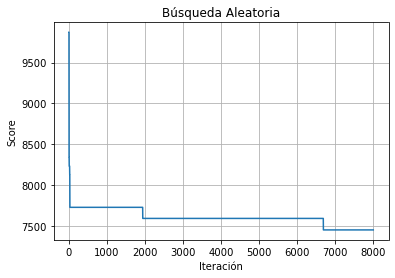

In [6]:
rs = rand_search(d, 8000)
rs_score = tiempo_final_f(funcion_f(rs, d))

print(f"Permutador: {rs}")
print(f"Puntuación: {rs_score}")

## Búsqueda Local
Este tipo de búsqueda, por otro lado, explota el camino encontrado, pero al caer en un máximo local no aseguramos que sea la mejor solución.
### Primero el mejor

Permutador: [10, 5, 4, 2, 11, 1, 3, 8, 9, 0, 7, 6]
Puntuación: 7527


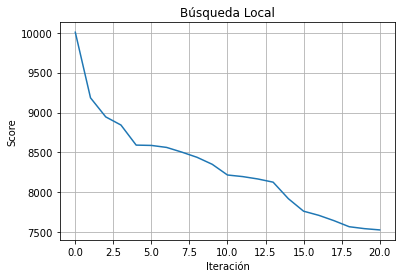

In [7]:
ls1 = local_search(d, True)
ls1_score = tiempo_final_f(funcion_f(ls1, d))

print(f"Permutador: {ls1}")
print(f"Puntuación: {ls1_score}")

## El mejor

Permutador: [10, 5, 4, 6, 9, 11, 8, 2, 3, 1, 7, 0]
Puntuación: 7448


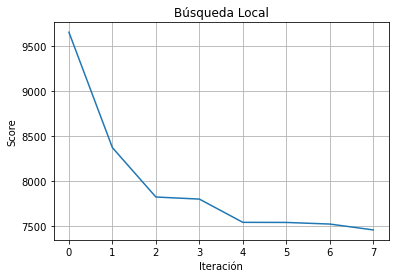

In [8]:
ls2 = local_search(d, False)
ls2_score = tiempo_final_f(funcion_f(rs, d))

print(f"Permutador: {ls2}")
print(f"Puntuación: {ls2_score}")

# Recocido

Permutador: [10, 11, 5, 4, 9, 8, 2, 1, 3, 6, 7, 0]
Puntuación: 7312


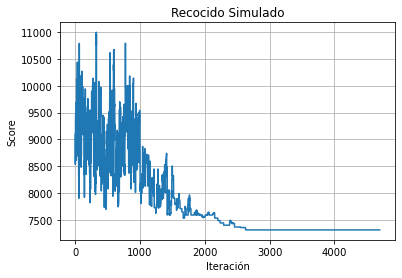

In [9]:
rec = recocido_simulado(d, 100)
rec_score = tiempo_final_f(funcion_f(rec, d))

print(f"Permutador: {rec}")
print(f"Puntuación: {rec_score}")

## Genético
Si jugamos bien con nuestros parámetros, explotaremos el camino encontrado mientras a su vez exploramos posibles alternativas

Permutador: [5, 10, 11, 11, 5, 6, 7, 0, 6, 7, 0, 0]
Puntuación: 5941


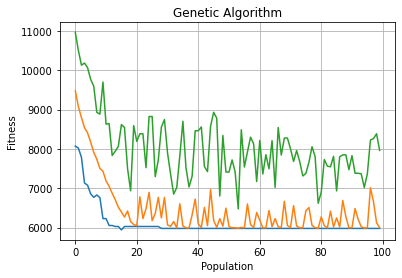

In [11]:
NIND = 100 # Número de individuos por población
NGEN = 100 # Número de generaciones por individuo
MUPB = 0.3 # Probabilidad de mutación
CXPB = 0.7 # Probabilidad de cruce

gen = genetic(d, NIND=NIND, NGEN=NGEN, MUPB=MUPB, CXPB=CXPB, OX=True, plot = True)
gen_score = tiempo_final_f(funcion_f(gen, d))

print(f"Permutador: {gen}")
print(f"Puntuación: {gen_score}")

In [ ]:
def ox(pareja):
    puntos = [random.randint(0, len(pareja[0]) - 1), random.randint(0, len(pareja[0]) - 1)]
    puntos.sort()
    retorno = [list(pareja[0]), list(pareja[1])]
    
    for k in range(2):
        bloque = list(pareja[k][puntos[0]:puntos[1]])
        aux = 0
        for i in range(len(pareja[0])):
            if pareja[k][i] not in bloque:
                for j in range(aux, len(pareja[0])):
                    aux += 1
                    if pareja[not k][j] not in bloque:
                        retorno[k][j] = pareja[not k][i]
                        break
                    
    return retorno

ox([[1,2,3,4,5,6,7,8,9],[5,7,4,9,1,3,6,2,8]])